# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [28]:
#Renaming the Column name for "Mouse Metadata" to not include quotes
study_results = study_results.rename(columns={' "Mouse ID" ': "Mouse ID"})

#Removing " " on Mouse ID for Mouse MetaData for the merge
study_results["Mouse ID"] = study_results["Mouse ID"].str.replace('"', " ")
study_results.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [29]:

# Combine the data into a single DataFrame
combined_studies = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_studies.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [30]:
# Checking the number of mice.
number_mice = len(combined_studies["Mouse ID"].unique())
number_mice

249

In [31]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_studies.loc[combined_studies.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicate_mouse


array(['g989'], dtype=object)

In [32]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_removed = combined_studies.loc[combined_studies["Mouse ID"]=="g989"]
mouse_removed

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_studies = combined_studies[combined_studies["Mouse ID"].isin(duplicate_mouse)==False]
cleaned_studies

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
# Checking the number of mice in the clean DataFrame.
number_mice = len(cleaned_studies["Mouse ID"].unique())
number_mice

248

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_volume = cleaned_studies.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_volume = cleaned_studies.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_volume = cleaned_studies.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_volume = cleaned_studies.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_volume = cleaned_studies.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
volume_summary = pd.DataFrame({"Mean Tumor Volume": mean_volume,
                               "Median Tumor volume": median_volume,
                               "Variance Tumor Volume": variance_volume,
                               "Standard Deviation Tumor Volume":std_volume,
                               "Standard Error of Volume": sem_volume})

volume_summary

,Mean Tumor Volume,Median Tumor volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error of Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregated = cleaned_studies.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
aggregated

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [37]:
regimen_group = cleaned_studies.groupby("Drug Regimen")
timepoint_count = regimen_group["Timepoint"].count()
timepoint_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

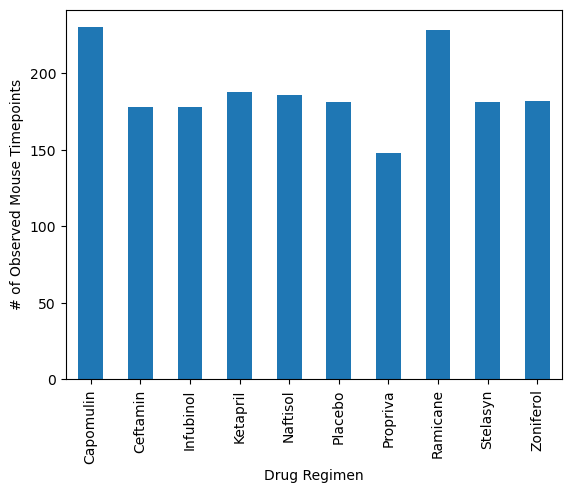

In [38]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_chart = timepoint_count.plot(kind="bar")
regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

<BarContainer object of 10 artists>

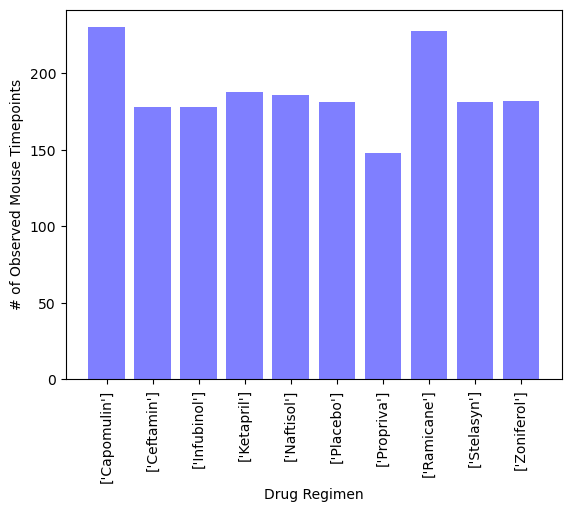

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(regimen_group))
ticklocations = [value for value in x_axis]
y_axis = timepoint_count
plt.xticks(ticklocations, regimen_group["Drug Regimen"].unique(), rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.bar(x_axis, y_axis, color = 'b', alpha = 0.5)

In [40]:
#Refining by Single Mouse
single_mouse = cleaned_studies[cleaned_studies["Timepoint"]==0]
sex_count = single_mouse["Sex"].value_counts()
sex_count 

Sex
Male      125
Female    123
Name: count, dtype: int64

<Axes: ylabel='count'>

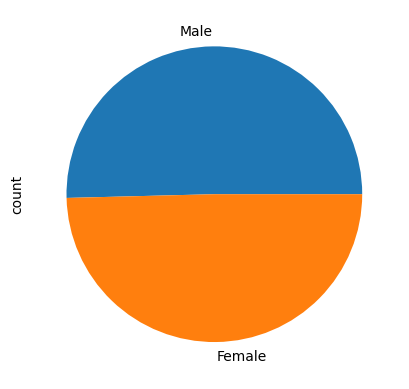

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_chart = single_mouse.Sex.value_counts().plot(kind="pie")
sex_chart

([<matplotlib.patches.Wedge at 0x14fec40a0>,
 [Text(-0.013934097579311132, 1.0999117423341975, 'Male'),
  Text(0.013934097579310996, -1.0999117423341975, 'Female')],
 [Text(-0.007600416861442434, 0.5999518594550168, '50.4%'),
  Text(0.007600416861442361, -0.5999518594550168, '49.6%')])

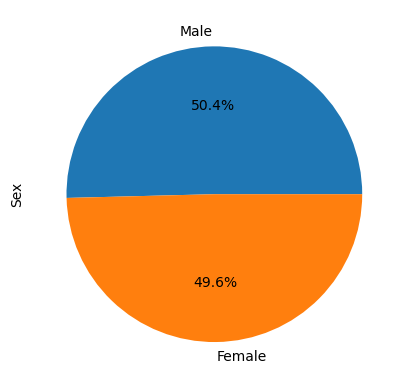

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label = sex_count.index
pie_py = plt.pie(sex_count, labels = label, autopct="%1.1f%%" )
plt.ylabel("Sex")
pie_py

## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
select_list = cleaned_studies[cleaned_studies["Drug Regimen"].isin(regimen_list)]

# Start by getting the last (greatest) timepoint for each mouse
max_tp = select_list.groupby("Mouse ID")['Timepoint'].max().reset_index("Mouse ID")


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_list = pd.merge(select_list, max_tp, how="inner")
merged_list_drug = merged_list.set_index("Drug Regimen")
merged_list_drug.head(10)

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,45,22.050126,1
Capomulin,s185,Female,3,17,45,23.343598,1
Capomulin,x401,Female,16,15,45,28.484033,0
Capomulin,m601,Male,22,17,45,28.430964,1
Ramicane,g791,Male,11,16,45,29.128472,1
Ramicane,s508,Male,1,17,45,30.276232,0
Capomulin,f966,Male,16,17,20,30.485985,0
Ramicane,m546,Male,18,16,45,30.564625,1
Ramicane,z578,Male,11,16,45,30.638696,0


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
data = []

for treatment in treatments:
    data = merged_list_drug.loc[treatment, "Tumor Volume (mm3)"]
    quartiles = data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    if data.min() < lower_bound:
        print(f'{treatment} has a potential outlier at {data.min()}')
        data.max() > upper_bound
        print(f'{treatment} has a potential outlier at {data.max()}')
    else:
        print(f'{treatment} has no potential outliers')
    



Capomulin has no potential outliers
Ramicane has no potential outliers
Infubinol has a potential outlier at 36.3213458
Infubinol has a potential outlier at 72.2267309
Ceftamin has no potential outliers


Tumor Volume (mm3)    Axes(0.125,0.11;0.775x0.77)
dtype: object

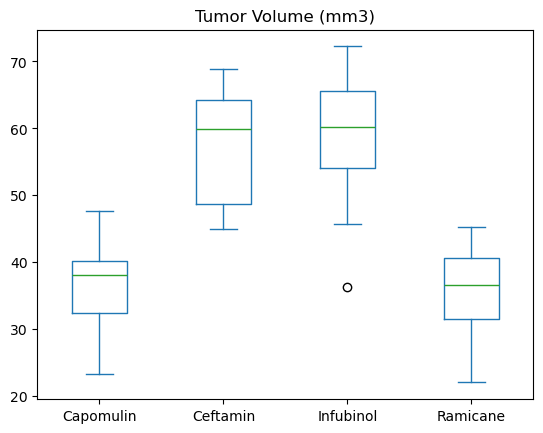

In [45]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = merged_list.plot.box(column="Tumor Volume (mm3)", by="Drug Regimen")
boxplot

## Line and Scatter Plots

In [46]:
#separate capomulin
capomulin_df = cleaned_studies[cleaned_studies["Drug Regimen"]=="Capomulin"]

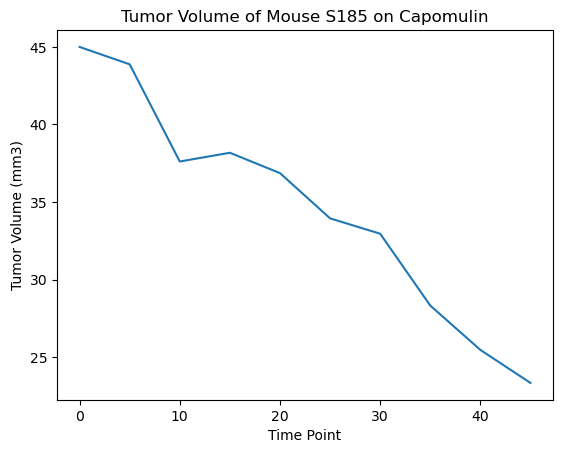

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis = capomulin_df.loc[capomulin_df["Mouse ID"]=="s185", "Timepoint"]
y_axis = capomulin_df.loc[capomulin_df["Mouse ID"]=="s185","Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume of Mouse S185 on Capomulin")
plt.show()

In [48]:
#Average tumor volume and weight for each mouse
average_tv = capomulin_df.groupby("Mouse ID")['Tumor Volume (mm3)'].mean().reset_index("Mouse ID")
cap_mouse_weight = capomulin_df.groupby("Mouse ID")['Weight (g)'].min().reset_index("Mouse ID")
cap_weight_avt = pd.merge(cap_mouse_weight, average_tv, on="Mouse ID")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

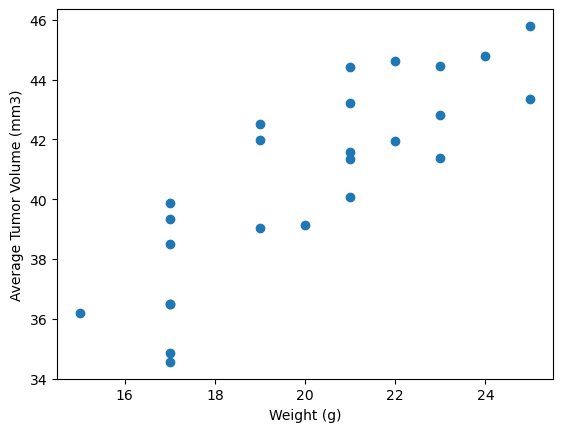

In [49]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(x=cap_weight_avt["Weight (g)"], y=cap_weight_avt["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694721.


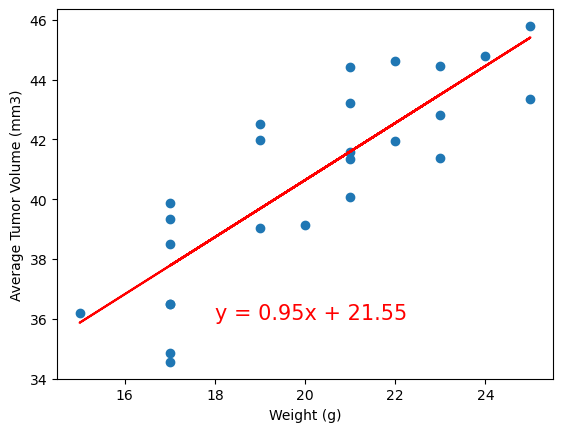

In [50]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
x_values = cap_weight_avt["Weight (g)"]
y_values = cap_weight_avt["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The correlation between mouse weight and the average tumor volume is {rvalue}.')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()